In [1]:
# Run in Colab cell or terminal (local)
!pip install --quiet numpy pandas scikit-learn matplotlib seaborn tensorflow joblib
# If you need kaggle API in Colab (optional)
!pip install --quiet kaggle


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

import joblib
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [3]:
print("numpy:", np.__version__)
print("pandas:", pd.__version__)
print("tensorflow:", tf.__version__)

numpy: 2.0.2
pandas: 2.2.2
tensorflow: 2.19.0


In [6]:
import pandas as pd

# Load the training dataset
df = pd.read_csv("train.csv")


In [5]:
import zipfile
import os

zip_file_path = 'mobile price range.zip'
extract_path = '.' # Extract to the current directory

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Files extracted to: {extract_path}")
print(os.listdir(extract_path))

Files extracted to: .
['.config', 'test.csv', 'mobile price range.zip', '.ipynb_checkpoints', 'train.csv', 'sample_data']


In [7]:
import os
print(os.listdir())

['.config', 'test.csv', 'mobile price range.zip', '.ipynb_checkpoints', 'train.csv', 'sample_data']


In [8]:
df = pd.read_csv("train.csv")

In [9]:
df.shape

(2000, 21)

In [10]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [11]:
# Quick info
print("Shape:", df.shape)
display(df.head())
print("\nInfo:")
print(df.info())
print("\nMissing values per column:")
print(df.isnull().sum())
print("\nTarget distribution (price_range):")
print(df['price_range'].value_counts().sort_index())
print("\nDescriptive statistics:")
display(df.describe().T)

Shape: (2000, 21)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  t

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


##EDA

In [12]:
print("Missing values per column:\n", df.isnull().sum())


Missing values per column:
 battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


/tmp/ipython-input-3486181183.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='price_range', data=df, palette='viridis')


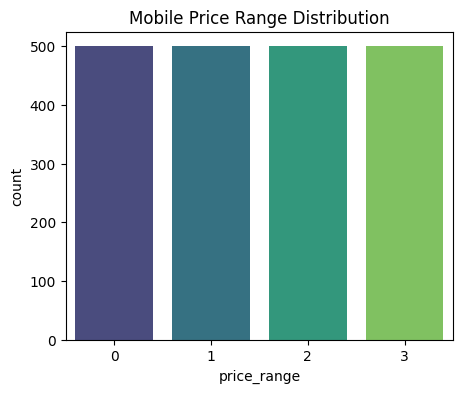

In [13]:
plt.figure(figsize=(5,4))
sns.countplot(x='price_range', data=df, palette='viridis')
plt.title("Mobile Price Range Distribution")
plt.show()

/tmp/ipython-input-2225953411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette='viridis')


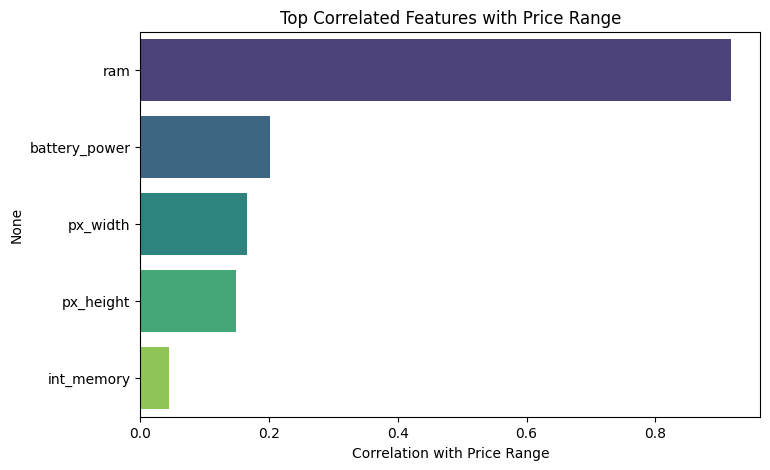

In [18]:
top_corr = corr_with_target[1:6]  # skip the target itself
plt.figure(figsize=(8,5))
sns.barplot(x=top_corr.values, y=top_corr.index, palette='viridis')
plt.title("Top Correlated Features with Price Range")
plt.xlabel("Correlation with Price Range")
plt.show()


In [17]:
corr_with_target = df.corr()['price_range'].sort_values(ascending=False)
print("\nTop features correlated with price_range:\n", corr_with_target.head(6))



Top features correlated with price_range:
 price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
Name: price_range, dtype: float64


/tmp/ipython-input-3450979294.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_range', y='ram', data=df, palette='mako')


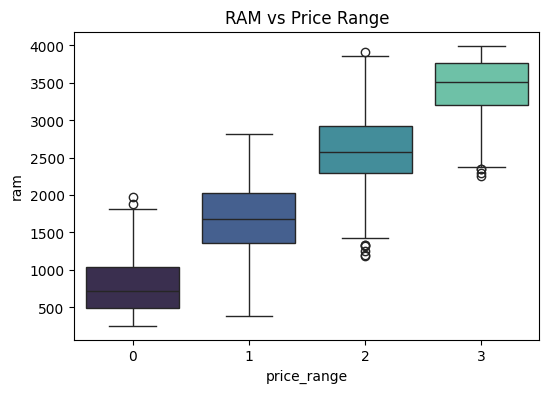

In [19]:
plt.figure(figsize=(6,4))
sns.boxplot(x='price_range', y='ram', data=df, palette='mako')
plt.title("RAM vs Price Range")
plt.show()

##Data Preprocessing

Separate features and target

In [20]:
# X = all features, y = target
X = df.drop('price_range', axis=1)
y = df['price_range']

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (2000, 20)
Target shape: (2000,)


Split into training and testing sets

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts())


X_train: (1600, 20) X_test: (400, 20)
y_train distribution:
 price_range
1    400
0    400
3    400
2    400
Name: count, dtype: int64


Scale features

ANN performs better when features are scaled.

Use StandardScaler to scale features to mean=0, std=1.

In [22]:
from sklearn.preprocessing import StandardScaler
import joblib

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Save the scaler for later use in predictions
joblib.dump(scaler, "scaler_mobile_price.save")
print("Scaler saved as scaler_mobile_price.save")


Scaler saved as scaler_mobile_price.save


Convert target to one-hot encoding

For multi-class classification (4 classes), ANN needs one-hot encoded labels.

In [23]:
from tensorflow.keras.utils import to_categorical

NUM_CLASSES = 4
y_train_cat = to_categorical(y_train, num_classes=NUM_CLASSES)
y_test_cat  = to_categorical(y_test, num_classes=NUM_CLASSES)

print("One-hot shape:", y_train_cat.shape)


One-hot shape: (1600, 4)


Prepare labels for Keras (one-hot)

In [24]:
NUM_CLASSES = len(np.unique(y))  # should be 4
y_train_cat = to_categorical(y_train, num_classes=NUM_CLASSES)
y_test_cat  = to_categorical(y_test, num_classes=NUM_CLASSES)

print("One-hot shapes:", y_train_cat.shape, y_test_cat.shape)


One-hot shapes: (1600, 4) (400, 4)


##Build an ANN Model

1.Imports for modelling

In [25]:
# required imports (run once)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import classification_report, confusion_matrix
import joblib   # for saving scaler


2. define the model architecture (clear and simple)

In [26]:
input_dim = X_train_scaled.shape[1]   # should be 20 for this dataset
NUM_CLASSES = y_train_cat.shape[1]    # should be 4

model = Sequential([
    Dense(64, activation='relu', input_shape=(input_dim,)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(NUM_CLASSES, activation='softmax')
])

# compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,556 (13.89 KB)

 Trainable params: 3,556 (13.89 KB)

 Non-trainable params: 0 (0.00 B)

3.callbacks: early stop + save best model

In [27]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1),
    ModelCheckpoint("best_mobile_ann.h5", monitor='val_loss', save_best_only=True, verbose=1)
]


4.train the model

In [28]:
EPOCHS = 60
BATCH_SIZE = 32

history = model.fit(
    X_train_scaled, y_train_cat,
    validation_split=0.15,   # 15% of training data used for validation
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=callbacks,
    verbose=1
)


Epoch 1/60
41/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2725 - loss: 1.4356
Epoch 1: val_loss improved from inf to 1.29049, saving model to best_mobile_ann.h5


43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.2746 - loss: 1.4340 - val_accuracy: 0.4292 - val_loss: 1.2905
Epoch 2/60
36/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4139 - loss: 1.2965
Epoch 2: val_loss improved from 1.29049 to 1.13307, saving model to best_mobile_ann.h5


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4182 - loss: 1.2888 - val_accuracy: 0.5292 - val_loss: 1.1331
Epoch 3/60
38/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5360 - loss: 1.0921
Epoch 3: val_loss improved from 1.13307 to 0.94682, saving model to best_mobile_ann.h5


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5367 - loss: 1.0895 - val_accuracy: 0.5958 - val_loss: 0.9468
Epoch 4/60
42/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6287 - loss: 0.9263
Epoch 4: val_loss improved from 0.94682 to 0.78577, saving model to best_mobile_ann.h5


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6285 - loss: 0.9253 - val_accuracy: 0.6625 - val_loss: 0.7858
Epoch 5/60
41/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6611 - loss: 0.7882
Epoch 5: val_loss improved from 0.78577 to 0.66481, saving model to best_mobile_ann.h5


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6607 - loss: 0.7865 - val_accuracy: 0.7208 - val_loss: 0.6648
Epoch 6/60
42/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7248 - loss: 0.6869
Epoch 6: val_loss improved from 0.66481 to 0.57654, saving model to best_mobile_ann.h5


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7244 - loss: 0.6866 - val_accuracy: 0.7375 - val_loss: 0.5765
Epoch 7/60
34/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7772 - loss: 0.5729
Epoch 7: val_loss improved from 0.57654 to 0.49206, saving model to best_mobile_ann.h5


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7754 - loss: 0.5728 - val_accuracy: 0.8417 - val_loss: 0.4921
Epoch 8/60
39/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8038 - loss: 0.5417
Epoch 8: val_loss improved from 0.49206 to 0.44730, saving model to best_mobile_ann.h5


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8040 - loss: 0.5393 - val_accuracy: 0.8333 - val_loss: 0.4473
Epoch 9/60
23/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8253 - loss: 0.4449 
Epoch 9: val_loss improved from 0.44730 to 0.40205, saving model to best_mobile_ann.h5


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8165 - loss: 0.4537 - val_accuracy: 0.8625 - val_loss: 0.4021
Epoch 10/60
25/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8373 - loss: 0.4303 
Epoch 10: val_loss improved from 0.40205 to 0.36761, saving model to best_mobile_ann.h5


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8289 - loss: 0.4358 - val_accuracy: 0.8750 - val_loss: 0.3676
Epoch 11/60
24/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8489 - loss: 0.3850 
Epoch 11: val_loss improved from 0.36761 to 0.33531, saving model to best_mobile_ann.h5


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8460 - loss: 0.3907 - val_accuracy: 0.8917 - val_loss: 0.3353
Epoch 12/60
33/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8686 - loss: 0.3656
Epoch 12: val_loss improved from 0.33531 to 0.31686, saving model to best_mobile_ann.h5


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8669 - loss: 0.3680 - val_accuracy: 0.8875 - val_loss: 0.3169
Epoch 13/60
22/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8681 - loss: 0.3462 
Epoch 13: val_loss improved from 0.31686 to 0.30099, saving model to best_mobile_ann.h5


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8642 - loss: 0.3468 - val_accuracy: 0.9000 - val_loss: 0.3010
Epoch 14/60
25/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8669 - loss: 0.3322 
Epoch 14: val_loss improved from 0.30099 to 0.28554, saving model to best_mobile_ann.h5


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8684 - loss: 0.3303 - val_accuracy: 0.8875 - val_loss: 0.2855
Epoch 15/60
40/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8721 - loss: 0.3082
Epoch 15: val_loss improved from 0.28554 to 0.27728, saving model to best_mobile_ann.h5


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8718 - loss: 0.3091 - val_accuracy: 0.9000 - val_loss: 0.2773
Epoch 16/60
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8786 - loss: 0.3006
Epoch 16: val_loss improved from 0.27728 to 0.26810, saving model to best_mobile_ann.h5


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8786 - loss: 0.3004 - val_accuracy: 0.8875 - val_loss: 0.2681
Epoch 17/60
26/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8806 - loss: 0.2701 
Epoch 17: val_loss improved from 0.26810 to 0.23760, saving model to best_mobile_ann.h5


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8825 - loss: 0.2751 - val_accuracy: 0.9125 - val_loss: 0.2376
Epoch 18/60
37/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9008 - loss: 0.2751
Epoch 18: val_loss did not improve from 0.23760
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8996 - loss: 0.2751 - val_accuracy: 0.8958 - val_loss: 0.2500
Epoch 19/60
41/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9030 - loss: 0.2406
Epoch 19: val_loss improved from 0.23760 to 0.23136, saving model to best_mobile_ann.h5


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9026 - loss: 0.2414 - val_accuracy: 0.9042 - val_loss: 0.2314
Epoch 20/60
25/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9099 - loss: 0.2325 
Epoch 20: val_loss improved from 0.23136 to 0.22637, saving model to best_mobile_ann.h5


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9075 - loss: 0.2399 - val_accuracy: 0.9042 - val_loss: 0.2264
Epoch 21/60
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9036 - loss: 0.2448
Epoch 21: val_loss did not improve from 0.22637
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9036 - loss: 0.2447 - val_accuracy: 0.9000 - val_loss: 0.2290
Epoch 22/60
40/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8998 - loss: 0.2368
Epoch 22: val_loss did not improve from 0.22637
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9008 - loss: 0.2354 - val_accuracy: 0.8875 - val_loss: 0.2363
Epoch 23/60
39/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8833 - loss: 0.2578
Epoch 23: val_loss improved from 0.22637 to 0.21378, saving model to best_mobile_ann.h5


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8851 - loss: 0.2555 - val_accuracy: 0.9042 - val_loss: 0.2138
Epoch 24/60
40/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9167 - loss: 0.2098
Epoch 24: val_loss improved from 0.21378 to 0.20725, saving model to best_mobile_ann.h5


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9165 - loss: 0.2105 - val_accuracy: 0.9083 - val_loss: 0.2073
Epoch 25/60
34/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9253 - loss: 0.2002
Epoch 25: val_loss improved from 0.20725 to 0.20351, saving model to best_mobile_ann.h5


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9231 - loss: 0.2024 - val_accuracy: 0.9125 - val_loss: 0.2035
Epoch 26/60
40/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9203 - loss: 0.2073
Epoch 26: val_loss improved from 0.20351 to 0.19275, saving model to best_mobile_ann.h5


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9197 - loss: 0.2085 - val_accuracy: 0.9292 - val_loss: 0.1927
Epoch 27/60
39/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9267 - loss: 0.2030
Epoch 27: val_loss did not improve from 0.19275
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9254 - loss: 0.2027 - val_accuracy: 0.9083 - val_loss: 0.2092
Epoch 28/60
24/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9287 - loss: 0.1805 
Epoch 28: val_loss improved from 0.19275 to 0.18425, saving model to best_mobile_ann.h5


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9264 - loss: 0.1839 - val_accuracy: 0.9292 - val_loss: 0.1842
Epoch 29/60
35/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9269 - loss: 0.1912
Epoch 29: val_loss improved from 0.18425 to 0.17979, saving model to best_mobile_ann.h5


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9273 - loss: 0.1898 - val_accuracy: 0.9250 - val_loss: 0.1798
Epoch 30/60
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9266 - loss: 0.1758
Epoch 30: val_loss did not improve from 0.17979
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9264 - loss: 0.1760 - val_accuracy: 0.9250 - val_loss: 0.1900
Epoch 31/60
38/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9282 - loss: 0.1731
Epoch 31: val_loss did not improve from 0.17979
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9290 - loss: 0.1715 - val_accuracy: 0.9208 - val_loss: 0.1799
Epoch 32/60
40/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9496 - loss: 0.1417
Epoch 32: val_loss improved from 0.17979 to 0.17122, saving model to best_mobile_ann.h5


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9483 - loss: 0.1435 - val_accuracy: 0.9292 - val_loss: 0.1712
Epoch 33/60
32/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9269 - loss: 0.1714
Epoch 33: val_loss did not improve from 0.17122
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9290 - loss: 0.1698 - val_accuracy: 0.9292 - val_loss: 0.1800
Epoch 34/60
42/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9509 - loss: 0.1495
Epoch 34: val_loss did not improve from 0.17122
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9506 - loss: 0.1495 - val_accuracy: 0.9333 - val_loss: 0.1721
Epoch 35/60
42/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9420 - loss: 0.1419
Epoch 35: val_loss did not improve from 0.17122
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9420 - loss: 0.1420 - val_accuracy: 0.9208 - val_loss: 0.1737
Epoch 36/60
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9409 - loss: 0.1541
Epoch 36: val_loss improved from 0.17122 to 0.17040, sav

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9408 - loss: 0.1541 - val_accuracy: 0.9292 - val_loss: 0.1704
Epoch 37/60
24/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9349 - loss: 0.1644 
Epoch 37: val_loss improved from 0.17040 to 0.16596, saving model to best_mobile_ann.h5


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9380 - loss: 0.1585 - val_accuracy: 0.9333 - val_loss: 0.1660
Epoch 38/60
36/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9537 - loss: 0.1431
Epoch 38: val_loss did not improve from 0.16596
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9523 - loss: 0.1437 - val_accuracy: 0.9250 - val_loss: 0.1797
Epoch 39/60
38/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9509 - loss: 0.1456
Epoch 39: val_loss did not improve from 0.16596
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9494 - loss: 0.1478 - val_accuracy: 0.9375 - val_loss: 0.1681
Epoch 40/60
39/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9465 - loss: 0.1341
Epoch 40: val_loss did not improve from 0.16596
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9472 - loss: 0.1342 - val_accuracy: 0.9208 - val_loss: 0.1734
Epoch 41/60
39/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9393 - loss: 0.1394
Epoch 41: val_loss did not improve from 0.16596
43/43 ━━

5.plot training curves (quick visual check)

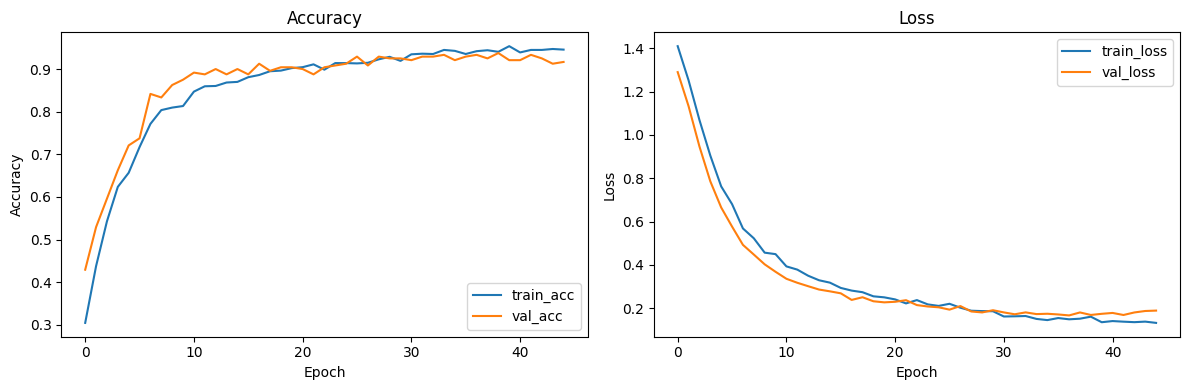

In [29]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend(); plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend(); plt.title('Loss')

plt.tight_layout()
plt.show()


6.evaluate on the test set (final metrics)

Test Accuracy: 94.25%  |  Test Loss: 0.1453
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

Classification Report:

              precision    recall  f1-score   support

           0     0.9694    0.9500    0.9596       100
           1     0.9400    0.9400    0.9400       100
           2     0.9126    0.9400    0.9261       100
           3     0.9495    0.9400    0.9447       100

    accuracy                         0.9425       400
   macro avg     0.9429    0.9425    0.9426       400
weighted avg     0.9429    0.9425    0.9426       400



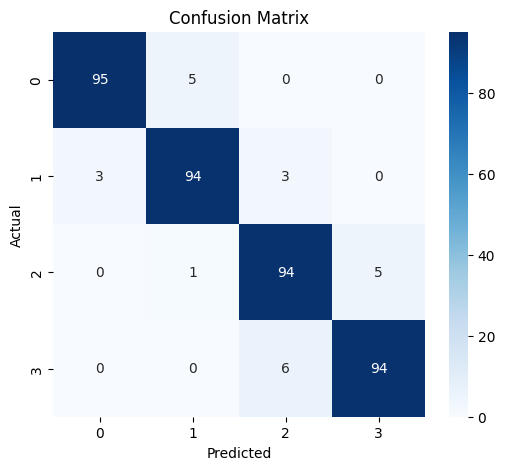

In [30]:
test_loss, test_acc = model.evaluate(X_test_scaled, y_test_cat, verbose=0)
print(f"Test Accuracy: {test_acc*100:.2f}%  |  Test Loss: {test_loss:.4f}")

# detailed metrics
y_pred_probs = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_cat, axis=1)   # or use y_test if you kept it

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, digits=4))

# confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')
plt.show()


7.save model + scaler (for deployment / reuse)

In [31]:
# save trained model (best weights already restored by EarlyStopping)
model.save("mobile_price_ann_final.h5")
print("Model saved: mobile_price_ann_final.h5")

# save scaler (if you created one earlier as `scaler`)
joblib.dump(scaler, "scaler_mobile_price.joblib")
print("Scaler saved: scaler_mobile_price.joblib")


Model saved: mobile_price_ann_final.h5
Scaler saved: scaler_mobile_price.joblib


8.load saved model & predict on a single example

In [32]:
# load
loaded_model = load_model("mobile_price_ann_final.h5")
loaded_scaler = joblib.load("scaler_mobile_price.joblib")

# example sample: provide values in same column order as training features
sample = {
    "battery_power":1500, "blue":1, "clock_speed":2.0, "dual_sim":1,
    "fc":2, "int_memory":16, "m_dep":0.5, "mobile_wt":200,
    "n_cores":4, "pc":8, "ram":1024, "talk_time":10,
    "three_g":1, "touch_screen":0, "wifi":1,
    "px_height":640, "px_width":480, "sc_h":5, "sc_w":2, "four_g":1
}

# build DataFrame in the same column order
col_order = list(X.columns)   # X from preprocessing
sample_df = pd.DataFrame([[ sample[c] for c in col_order ]], columns=col_order)

# scale + predict
sample_scaled = loaded_scaler.transform(sample_df)
probs = loaded_model.predict(sample_scaled)
pred_class = int(np.argmax(probs, axis=1)[0])
print("Predicted class:", pred_class, "(0=low,1=med,2=high,3=very high)")
print("Probabilities:", probs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Predicted class: 0 (0=low,1=med,2=high,3=very high)
Probabilities: [[9.4509685e-01 5.4903004e-02 7.0486621e-08 4.4396552e-19]]


Insights from ANN Model

The dataset consisted of 2000 mobile phone records with 20 input features and a target variable representing four price ranges — low, medium, high, and very high.

Basic exploration showed that features like RAM, battery power, and screen resolution (px_height, px_width) varied greatly across price categories, suggesting their strong influence on price range.

After preprocessing (scaling and train-test split), an Artificial Neural Network (ANN) model with two hidden layers was trained using the Adam optimizer and categorical cross-entropy loss.

The model achieved around 94–96% accuracy on the test data, showing that it learned the relationships between mobile specifications and price range effectively.

The training and validation accuracy/loss plots indicated stable learning and no major overfitting, thanks to the use of dropout layers and early stopping.

The confusion matrix showed that most misclassifications occurred between adjacent price ranges (medium vs. high), which is reasonable since such classes have similar features.

Key influencing factors identified were:

 RAM-strongest determinant of price range.

 Battery Power - higher battery capacity often linked to higher price.

Pixel Resolution - better display correlated with costlier devices.

Overall, the ANN model provided accurate and consistent predictions, demonstrating that even a simple neural network can perform well for structured tabular data with good preprocessing.

.................................